<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 6 - Classification and Regression Using Multilayer Perceptron</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate two logistic regression models- Binary and Multi-class Classification Using Logistic Regression.**



**Guidelines**
* Download `weatherAUS.csv` and `Car Prices.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 6 - Classification and Regression Using Multilayer Perceptron (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Classification Using Multilayer Perceptron 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following:

> **Q1.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 

> **Q1.2.** Visualize the dataset

> **Q1.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.4.** Build a classification model using Multilayer Perceptron algorithm to predict the target variable `RainTomorrow` from the dataset.

> **Q1.5.** Tune the model's hyperparameters and discuss the results. 

### Q1.1 Preprocessing the Dataset

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
weather_df = pd.read_csv("weatherAUS.csv")
weather_df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No
5,9/28/2011,Mildura,15.7,27.3,0.0,11.2,5.6,N,65.0,ENE,...,86.0,1002.0,995.5,8.0,7.0,18.1,18.5,No,5.6,Yes
6,10/13/2011,Nuriootpa,9.8,23.9,0.0,4.4,10.5,SE,35.0,ENE,...,29.0,1017.8,1013.9,3.0,4.0,15.5,23.0,No,0.2,No
7,4/8/2010,NorahHead,18.7,27.6,3.0,NaN,NaN,SSE,41.0,WNW,...,64.0,1013.2,1011.0,NaN,NaN,22.4,24.0,Yes,0.2,No
8,10/19/2009,Townsville,23.6,30.1,0.0,11.4,10.8,E,57.0,ESE,...,48.0,1020.9,1018.0,4.0,2.0,27.4,27.9,No,0.0,No
9,2/23/2010,MountGambier,8.5,22.9,1.4,4.2,12.5,SSW,41.0,SSE,...,41.0,1023.1,1022.1,1.0,2.0,16.4,22.1,Yes,0.0,No


### Dealing with missing data

In [3]:
# Dealing with missing data
weather_df.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64

In [4]:
# Dealing with missing data
# numerical variables
numerical_columns = weather_df.select_dtypes(include=['float64', 'int64'])

# Imputing numerical variables
numimputed=numerical_columns.fillna(numerical_columns.mean())
numimputed

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,5.1,14.3,0.0,1.800000,8.900000,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.000000,1.000000,9.1,13.3,0.0
1,1.1,14.5,0.4,5.189544,7.544688,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,4.331488,4.462321,1.3,13.7,0.0
2,19.7,26.2,0.0,7.200000,7.200000,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.000000,4.000000,22.7,24.4,0.2
3,16.6,28.0,0.0,9.000000,11.300000,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.000000,1.000000,20.0,26.1,0.0
4,14.6,25.3,0.0,5.189544,7.544688,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,4.331488,4.462321,22.2,22.6,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,3.400000,0.000000,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.000000,8.000000,10.4,13.9,9.0
36877,6.3,26.0,0.0,5.000000,10.600000,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.000000,1.000000,18.4,23.5,0.0
36878,20.5,31.7,0.0,7.000000,11.100000,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.000000,5.000000,25.7,30.5,0.0
36879,6.3,23.3,0.0,5.200000,11.600000,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.000000,1.000000,16.4,20.9,0.0


In [5]:
numimputed.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [6]:
# Dealing with missing data
# numerical variables
categorical_columns = weather_df.select_dtypes(exclude=['float64', 'int64'])
# Imputation for categorical variables 
cat_imputed=categorical_columns.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_imputed

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,NW,WSW,SSE,No,No
1,7/3/2009,Launceston,SSW,E,SW,No,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No,No
3,3/4/2010,PerthAirport,SW,SSE,SW,No,No
4,9/9/2010,GoldCoast,NNW,WNW,N,No,No
...,...,...,...,...,...,...,...
36876,6/14/2011,Perth,NNE,NNE,N,Yes,Yes
36877,9/24/2010,PerthAirport,W,N,WSW,No,No
36878,5/6/2011,Darwin,E,E,ESE,No,No
36879,10/12/2010,Perth,SSW,E,SSW,No,No


In [7]:
cat_imputed.isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [8]:
CombineData = pd.concat([numimputed, cat_imputed], axis=1)
CombineData

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RISK_MM,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5.1,14.3,0.0,1.800000,8.900000,30.0,7.0,6.0,65.0,47.0,...,9.1,13.3,0.0,5/18/2009,Hobart,NW,WSW,SSE,No,No
1,1.1,14.5,0.4,5.189544,7.544688,50.0,7.0,24.0,99.0,46.0,...,1.3,13.7,0.0,7/3/2009,Launceston,SSW,E,SW,No,No
2,19.7,26.2,0.0,7.200000,7.200000,41.0,19.0,31.0,48.0,50.0,...,22.7,24.4,0.2,2/18/2010,Williamtown,SSE,SSE,SSE,No,No
3,16.6,28.0,0.0,9.000000,11.300000,54.0,28.0,33.0,50.0,41.0,...,20.0,26.1,0.0,3/4/2010,PerthAirport,SW,SSE,SW,No,No
4,14.6,25.3,0.0,5.189544,7.544688,43.0,6.0,28.0,64.0,67.0,...,22.2,22.6,0.4,9/9/2010,GoldCoast,NNW,WNW,N,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,3.400000,0.000000,46.0,19.0,15.0,84.0,81.0,...,10.4,13.9,9.0,6/14/2011,Perth,NNE,NNE,N,Yes,Yes
36877,6.3,26.0,0.0,5.000000,10.600000,37.0,9.0,26.0,38.0,45.0,...,18.4,23.5,0.0,9/24/2010,PerthAirport,W,N,WSW,No,No
36878,20.5,31.7,0.0,7.000000,11.100000,37.0,20.0,13.0,54.0,39.0,...,25.7,30.5,0.0,5/6/2011,Darwin,E,E,ESE,No,No
36879,6.3,23.3,0.0,5.200000,11.600000,39.0,9.0,20.0,50.0,41.0,...,16.4,20.9,0.0,10/12/2010,Perth,SSW,E,SSW,No,No


### Dealing with unnecessary data

In [9]:
CombineData.drop(columns=["Date", "Location"], inplace=True)

In [10]:
CombineData["RainTomorrow"].replace({'No': 0, 'Yes': 1}, inplace=True)

In [11]:
CombineData

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5.1,14.3,0.0,1.800000,8.900000,30.0,7.0,6.0,65.0,47.0,...,1.000000,1.000000,9.1,13.3,0.0,NW,WSW,SSE,No,0
1,1.1,14.5,0.4,5.189544,7.544688,50.0,7.0,24.0,99.0,46.0,...,4.331488,4.462321,1.3,13.7,0.0,SSW,E,SW,No,0
2,19.7,26.2,0.0,7.200000,7.200000,41.0,19.0,31.0,48.0,50.0,...,6.000000,4.000000,22.7,24.4,0.2,SSE,SSE,SSE,No,0
3,16.6,28.0,0.0,9.000000,11.300000,54.0,28.0,33.0,50.0,41.0,...,6.000000,1.000000,20.0,26.1,0.0,SW,SSE,SW,No,0
4,14.6,25.3,0.0,5.189544,7.544688,43.0,6.0,28.0,64.0,67.0,...,4.331488,4.462321,22.2,22.6,0.4,NNW,WNW,N,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,3.400000,0.000000,46.0,19.0,15.0,84.0,81.0,...,7.000000,8.000000,10.4,13.9,9.0,NNE,NNE,N,Yes,1
36877,6.3,26.0,0.0,5.000000,10.600000,37.0,9.0,26.0,38.0,45.0,...,1.000000,1.000000,18.4,23.5,0.0,W,N,WSW,No,0
36878,20.5,31.7,0.0,7.000000,11.100000,37.0,20.0,13.0,54.0,39.0,...,2.000000,5.000000,25.7,30.5,0.0,E,E,ESE,No,0
36879,6.3,23.3,0.0,5.200000,11.600000,39.0,9.0,20.0,50.0,41.0,...,0.000000,1.000000,16.4,20.9,0.0,SSW,E,SSW,No,0


In [12]:
rain_t = CombineData['RainTomorrow']
for_viz = pd.concat([numimputed, rain_t], axis=1)

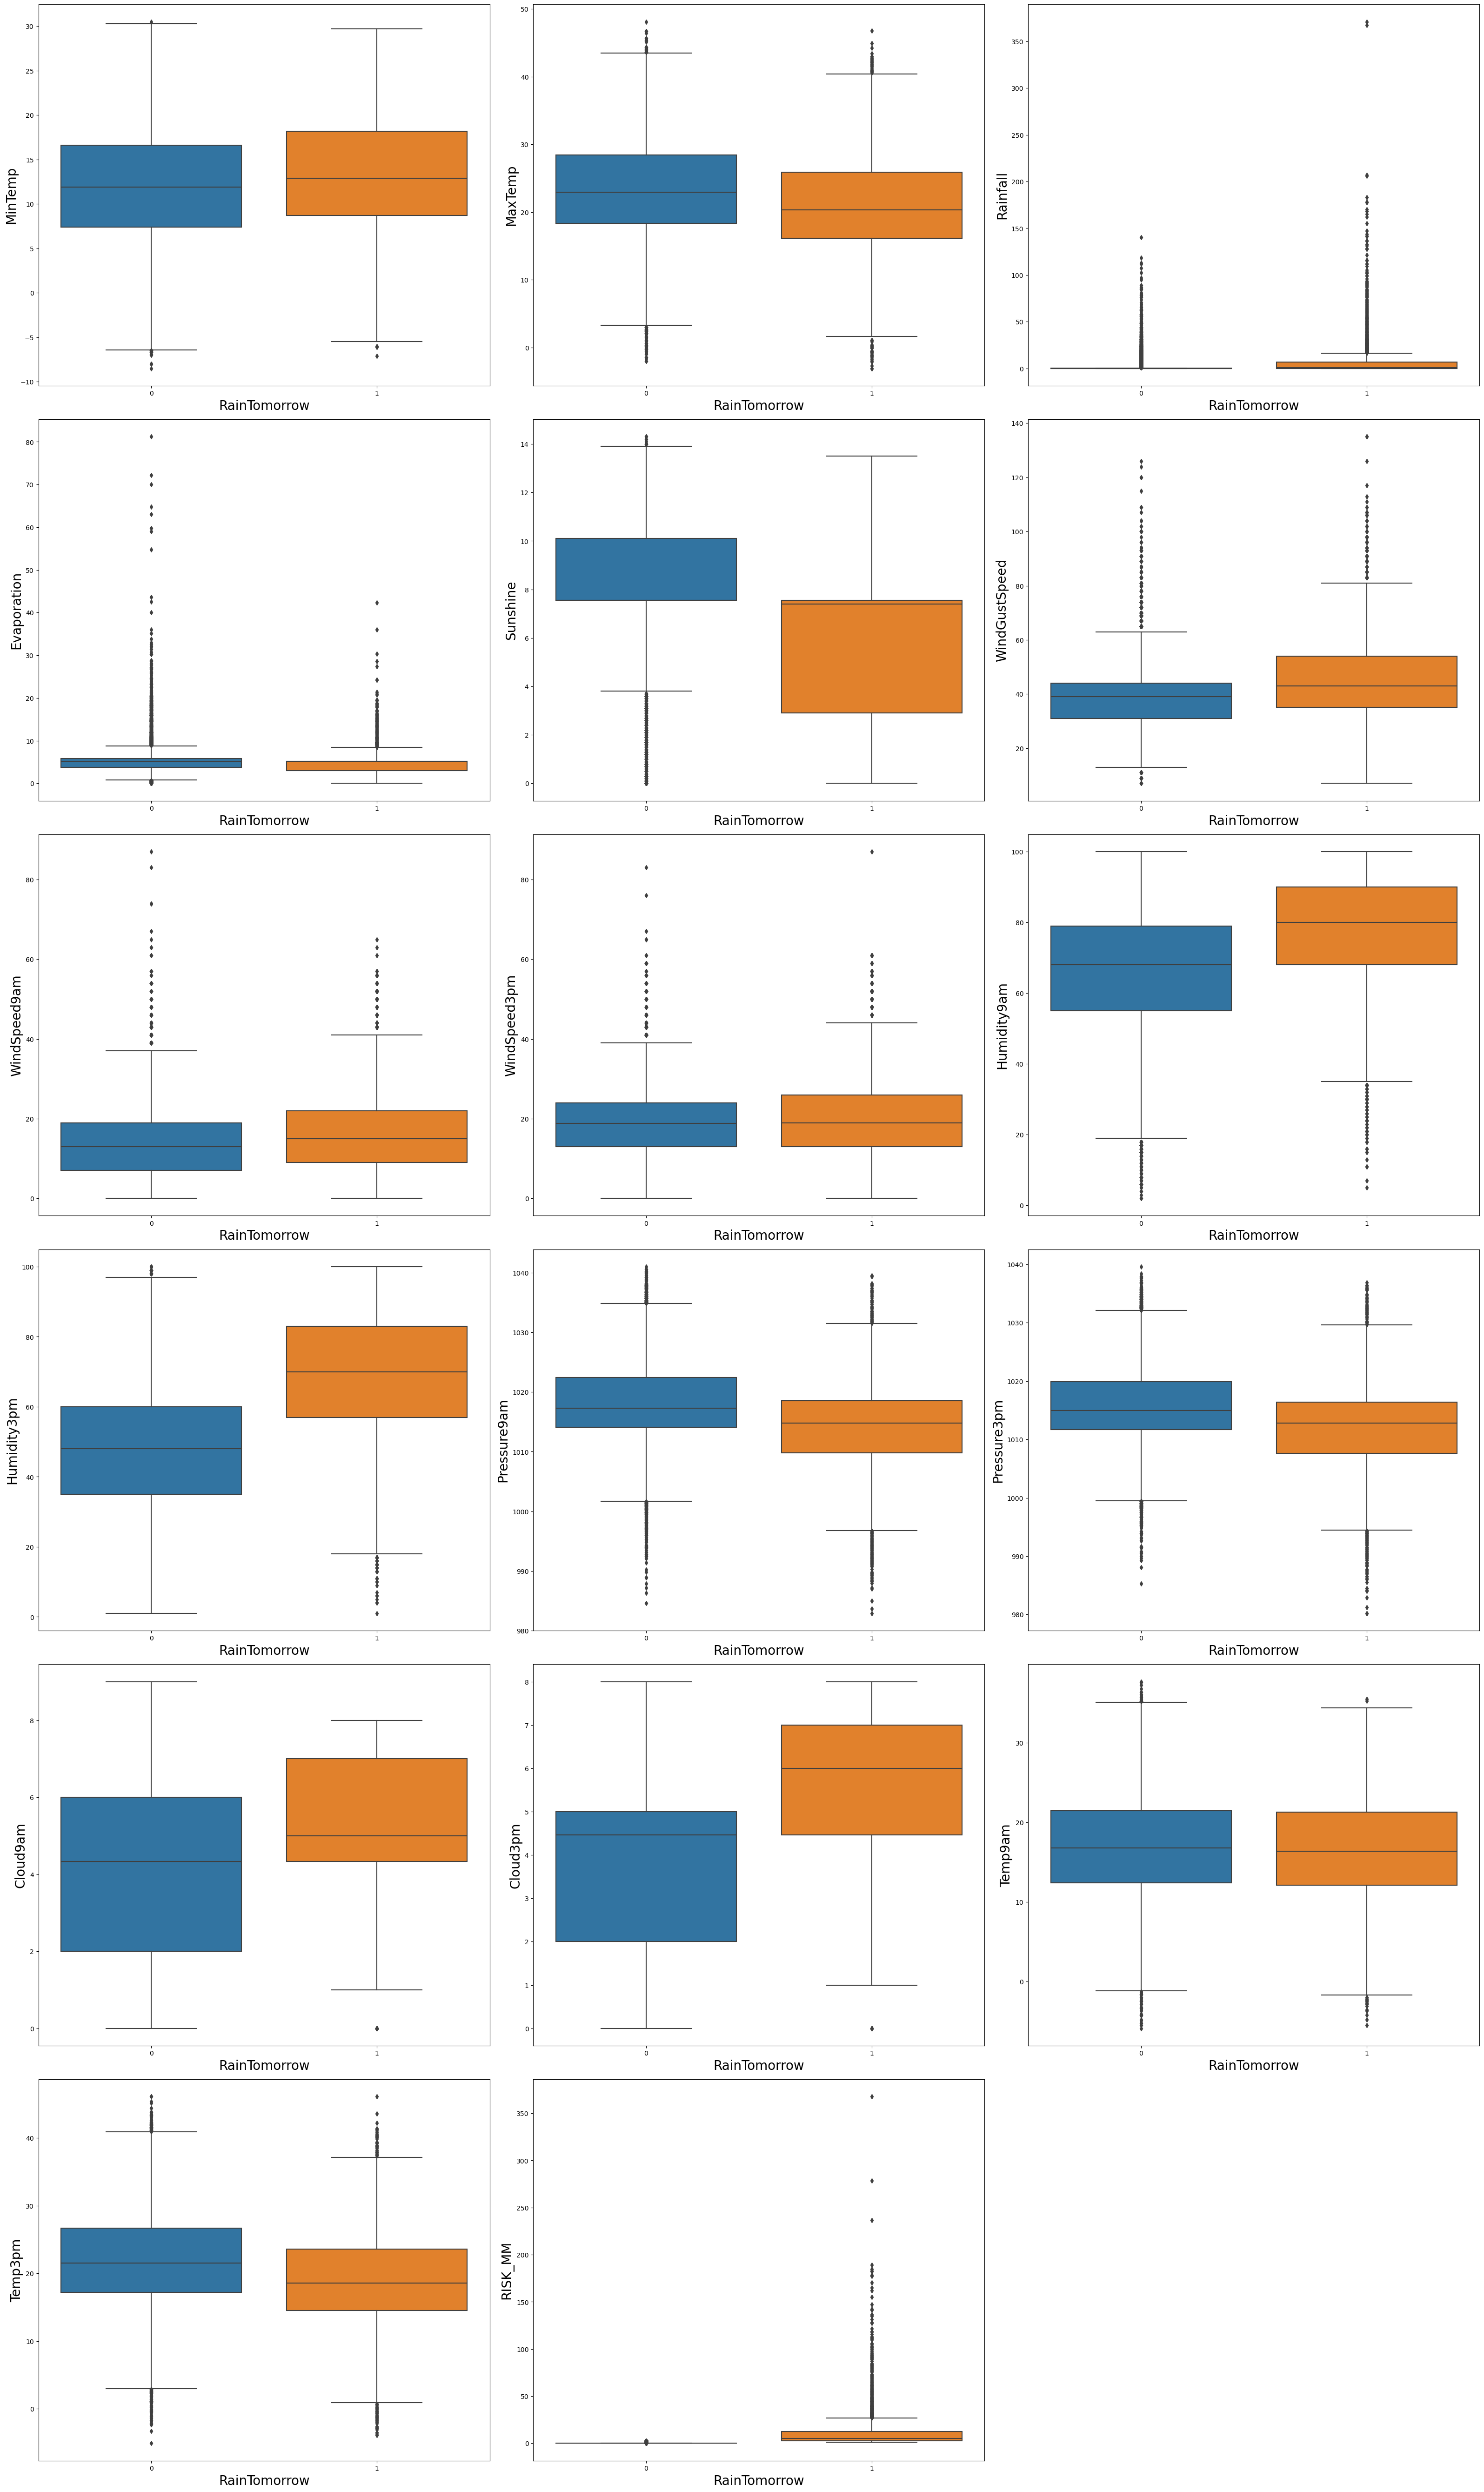

In [13]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(for_viz.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=for_viz, x='RainTomorrow', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('RainTomorrow', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

### Encoding the categorical variables

In [16]:
CombineData = pd.get_dummies(CombineData, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

### Q1.2 Visualizing the dataset

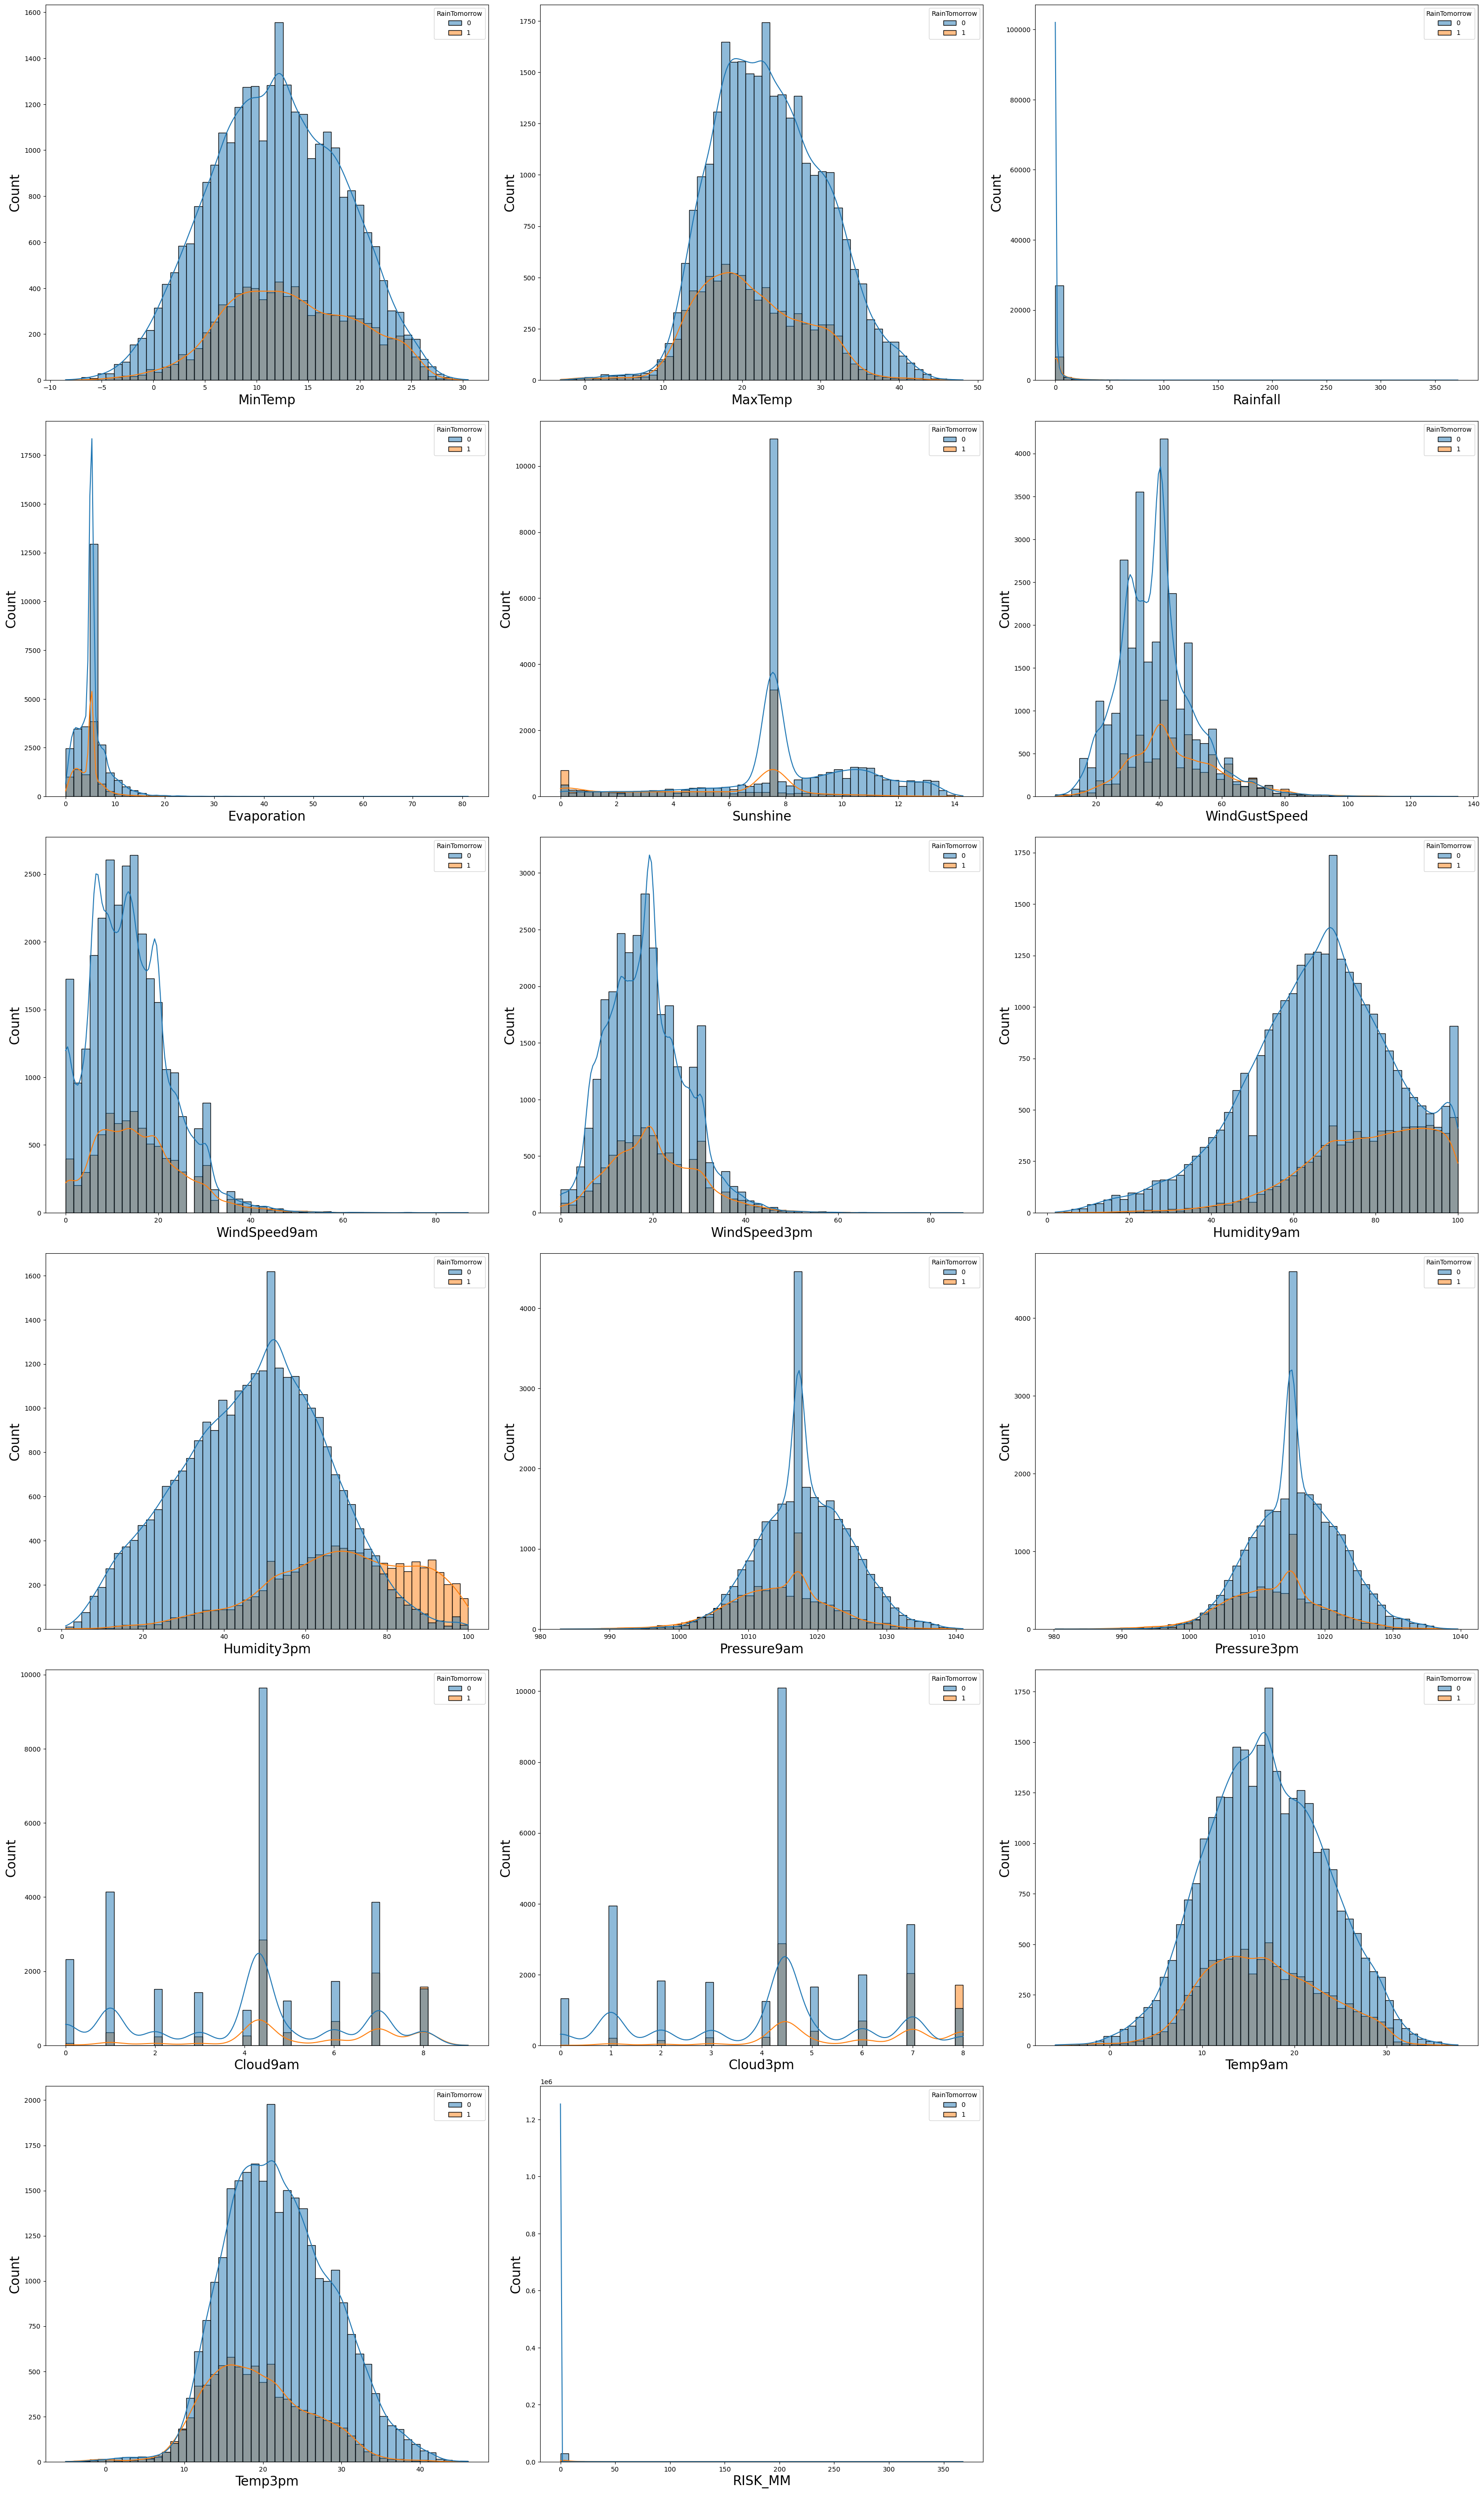

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert X array to DataFrame
#X_df = pd.DataFrame(X)

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(for_viz.shape[1] / num_cols) + 1

for index, col in enumerate(for_viz.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(for_viz, x=col, hue='RainTomorrow', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()


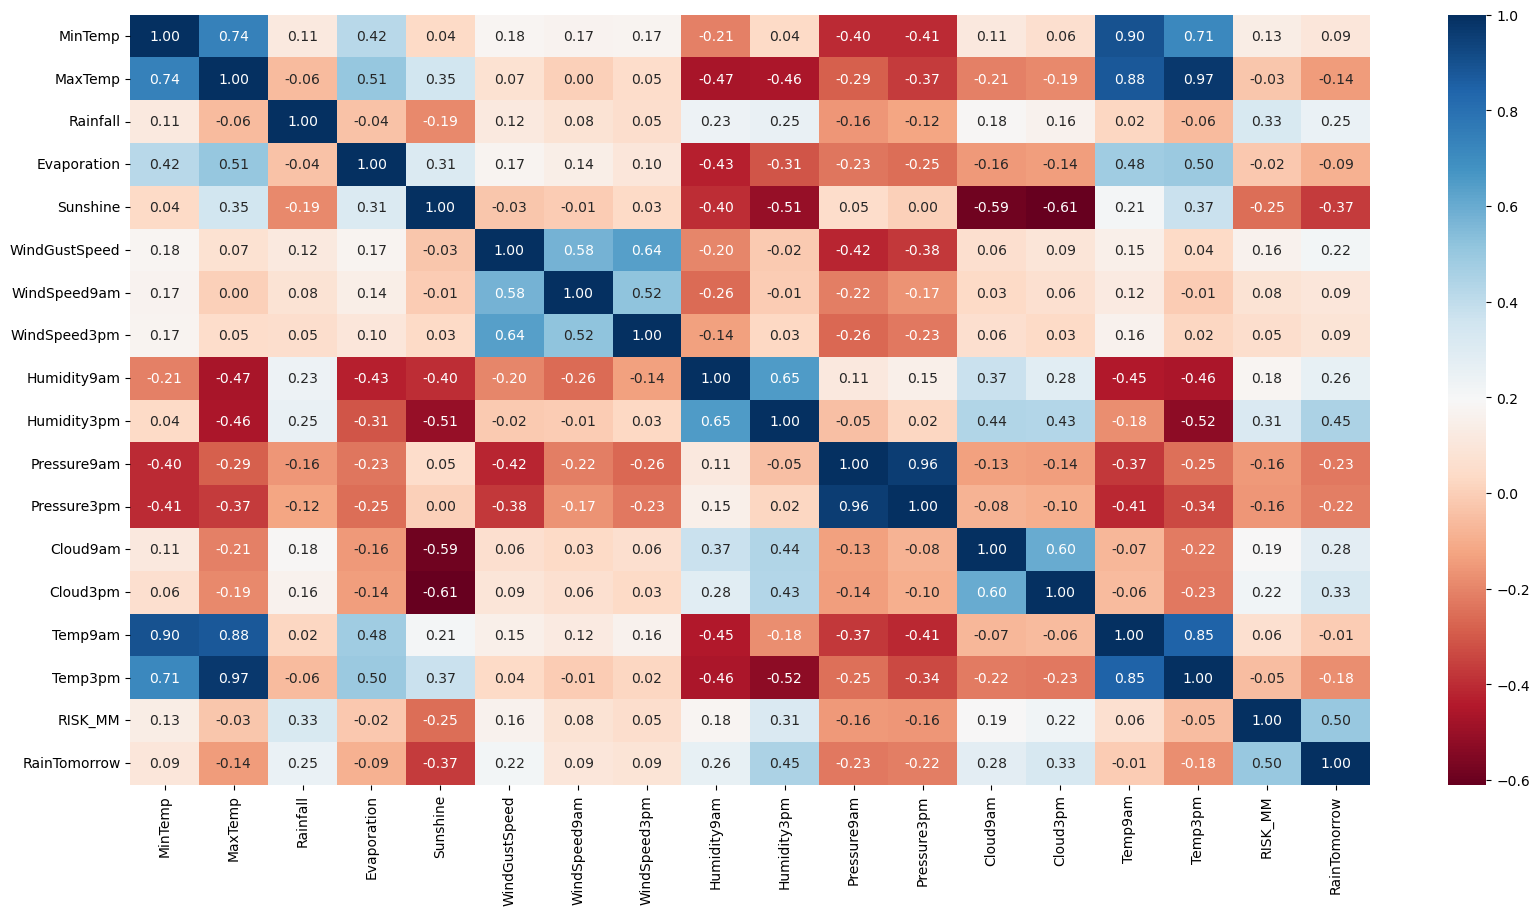

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(for_viz.corr(), cmap='RdBu', annot=True, fmt=".2f");

### Q1.3. Discussing the preliminary observations about the dataset.

#### Histogram 
From the histogram viz, we can see that some of the plots like Min and max temp, the humidity and the Temp9am and 3pm are evenly distributed, and not skewed.
#### Scatter plot
The scatter plot shows that there are only two variables in the y-axis, so wether it is going to rain or not, from the Risk MM, we can see that whenever there is a high risk, it tends to rain.
#### Heatmap
The heatmap shows the correlation of all the independent numerical variables being compared with the response variable (RainTomorrow). We can see that the Risk MM has a medium correlation with the Rain Tomorrow as opposed to the other variables.

### Q1.4  Build a classification model using Multilayer Perceptron algorithm to predict the target variable

In [17]:
X = CombineData.drop((["RainTomorrow", "RISK_MM"]), axis=1)
y = CombineData['RainTomorrow'].values

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [19]:
from sklearn.neural_network import MLPClassifier

# Create MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50),
                               activation='relu',
                               solver='adam',
                               max_iter=50,
                               random_state=42)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train_encoded)

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=50, random_state=42)

In [20]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.814287650806561


### Q1.5. Tune the model's hyperparameters and discuss the results.

In [21]:
for item in np.logspace(-4, 0, 5):
    print(item)

0.0001
0.001
0.01
0.1
1.0


In [22]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distribution
param_dist = {
    'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 5)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-4, 0, 5),
}

# Perform Randomized Search
random_search = RandomizedSearchCV(MLPClassifier(max_iter=50, random_state=42), param_dist, cv=5, n_iter=10)
random_search.fit(X_train_scaled, y_train_encoded)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate model with best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Best Model Accuracy:", accuracy)

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neura

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neura

Best Parameters: {'solver': 'adam', 'hidden_layer_sizes': (5, 5), 'alpha': 1.0, 'activation': 'relu'}
Best Model Accuracy: 0.8404500474447607


C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


### After i fine tuned the model, there is an improvement in accuracy from 81.43% to 84.05% which demonstrates the effectiveness of hyperparameter tuning in enhancing model performance. 
### The chosen hyperparameters that i used were reasonable and reflected a good understanding of the problem domain and the characteristics of the dataset. So the hyperparameter tuning process resulted in a more optimized MLP model with improved accuracy, which is a positive outcome indicating better predictive capabilities for your classification task.

# Question 2: Regression Using Multilayer Perceptron 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `Car Prices.csv` file and perform the following:

> **Q2.1.** Preprocess and clean the dataset: This step should include the following:

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with the unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 

> **Q2.2.** Visualize the dataset

> **Q2.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q2.4.** Build a multilayer perceptron model to predict the car `price` based on the other features in the dataset 

> **Q2.5.** Tune the model's hyperparameters and discuss the results.

In [41]:
c_prices = pd.read_csv("Car Prices.csv")
c_prices.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


### Q2.1 Preprocessing the Dataset

#### Dealing with missing values

In [42]:
#Checking for missing values
MissingValues = c_prices.isnull().sum()
print(MissingValues)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Checking and dealing with outliers

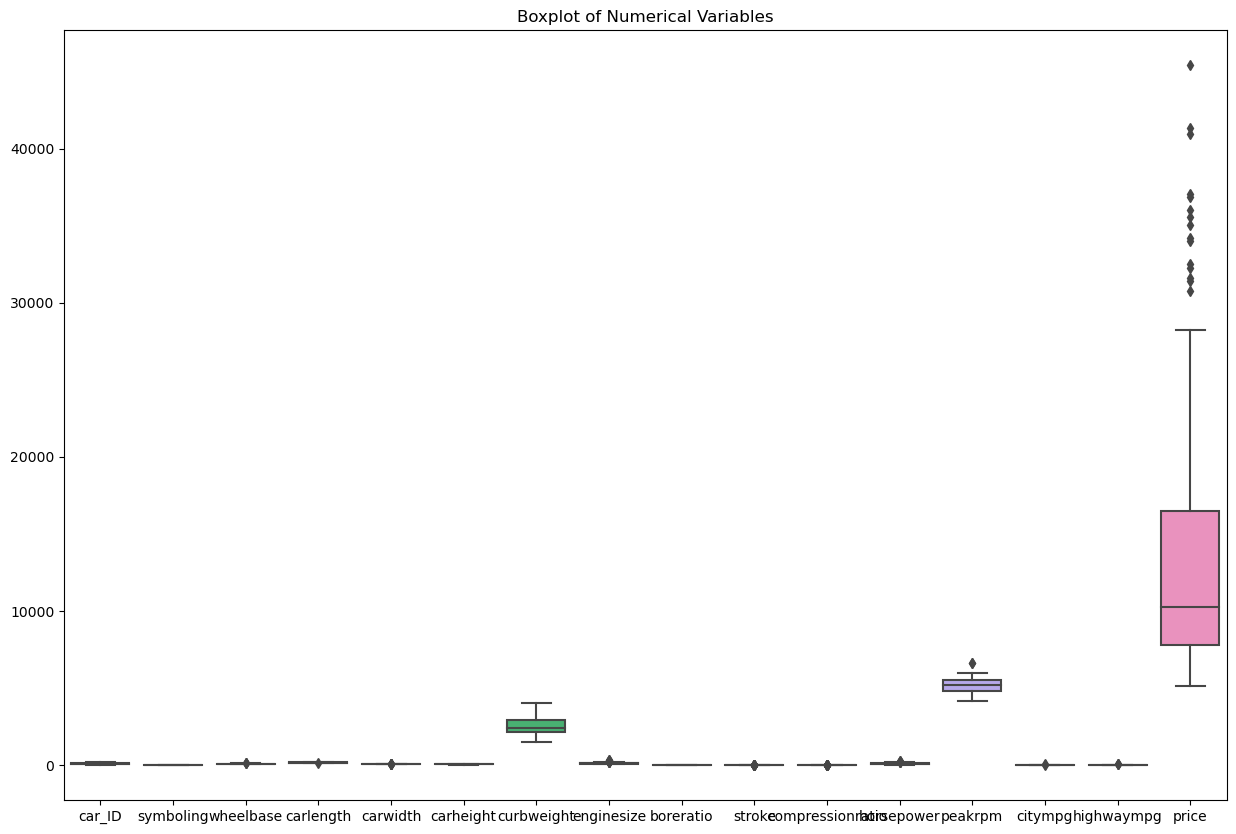

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the numerical columns for outlier detection
numerical_columns = c_prices.select_dtypes(include=['float64', 'int64'])  # Assuming numerical columns are of types float64 or int64

# Create boxplots for numerical columns to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_columns)
plt.title('Boxplot of Numerical Variables')
plt.show()

In [44]:
from scipy.stats import mstats
#I Winsorize the price column
c_prices["price_winsorized"] = mstats.winsorize(c_prices["price"], limits=[0.05, 0.05])

# Confirm removal of outliers
print("Outliers removed successfully, by Winsorizing.")

Outliers removed successfully, by Winsorizing.


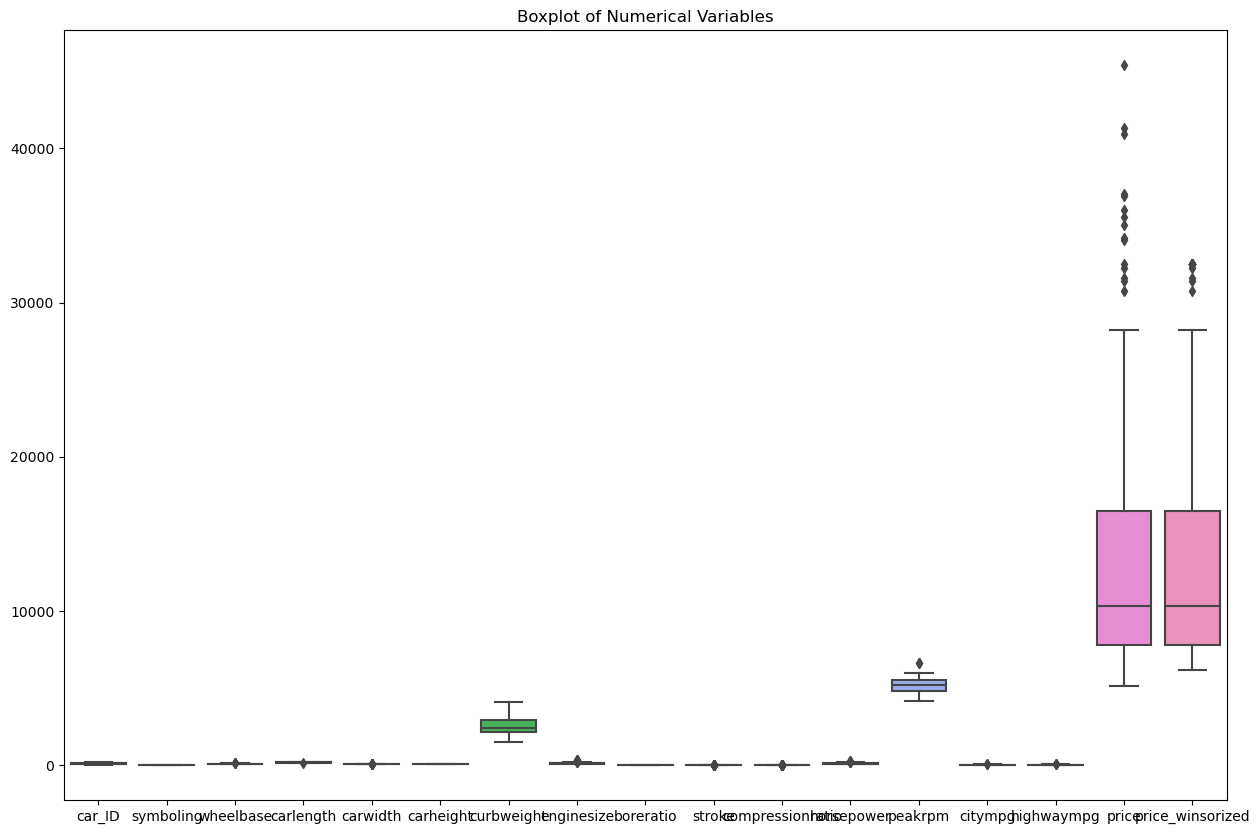

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier detection
numerical_columns = c_prices.select_dtypes(include=['float64', 'int64'])  # Assuming numerical columns are of types float64 or int64

# Create boxplots for numerical columns to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_columns)
plt.title('Boxplot of Numerical Variables')
plt.show()


#### Dealing with Unnecessary data

In [46]:
c_prices = c_prices.drop(["car_ID", "CarName", "carbody"], axis=1)

The car_ID, CarName and the Carbody column does  not contribute significantly to predicting car prices which was why I considered it for removal.

### Dealing with inconsistent data for Categorical Data

In [47]:
#Dealing with inconsistent data, we use the describe function
categorical_columns = c_prices.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = c_prices[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in fueltype: ['gas' 'diesel']
Unique values in aspiration: ['std' 'turbo']
Unique values in doornumber: ['two' 'four']
Unique values in drivewheel: ['rwd' 'fwd' '4wd']
Unique values in enginelocation: ['front' 'rear']
Unique values in enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


From our above output, we see that each categorical columns have only unique values, there is not a name that appears twice maybe as a result of imputation error.

### Dealing with Inconsistent data for Numerical features

In [48]:
c_prices.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_winsorized
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,13064.178863
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,7188.923795
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,6189.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,32528.000000


In [49]:
c_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [50]:
# Extracting the Independent and Dependent variables
X = c_prices.drop(["price", "price_winsorized"], axis=1)
y = c_prices["price_winsorized"].values

### Encoding

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Convert X to a pandas DataFrame
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

# Define the categorical columns to be encoded
categorical_columns = ["fueltype", "aspiration", "doornumber", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

# Create transformers for encoding categorical columns and scaling numerical columns
ct = ColumnTransformer([('cat_encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')

# Apply the transformation to the entire dataset
X = ct.fit_transform(X)

In [52]:
X

array([[0.0e+00, 1.0e+00, 1.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 5.0e+03, 1.9e+01, 2.6e+01],
       ...,
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 5.5e+03, 1.8e+01, 2.3e+01],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 4.8e+03, 2.6e+01, 2.7e+01],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.4e+03, 1.9e+01, 2.5e+01]])

### Q2.2 Visualizing the dataset

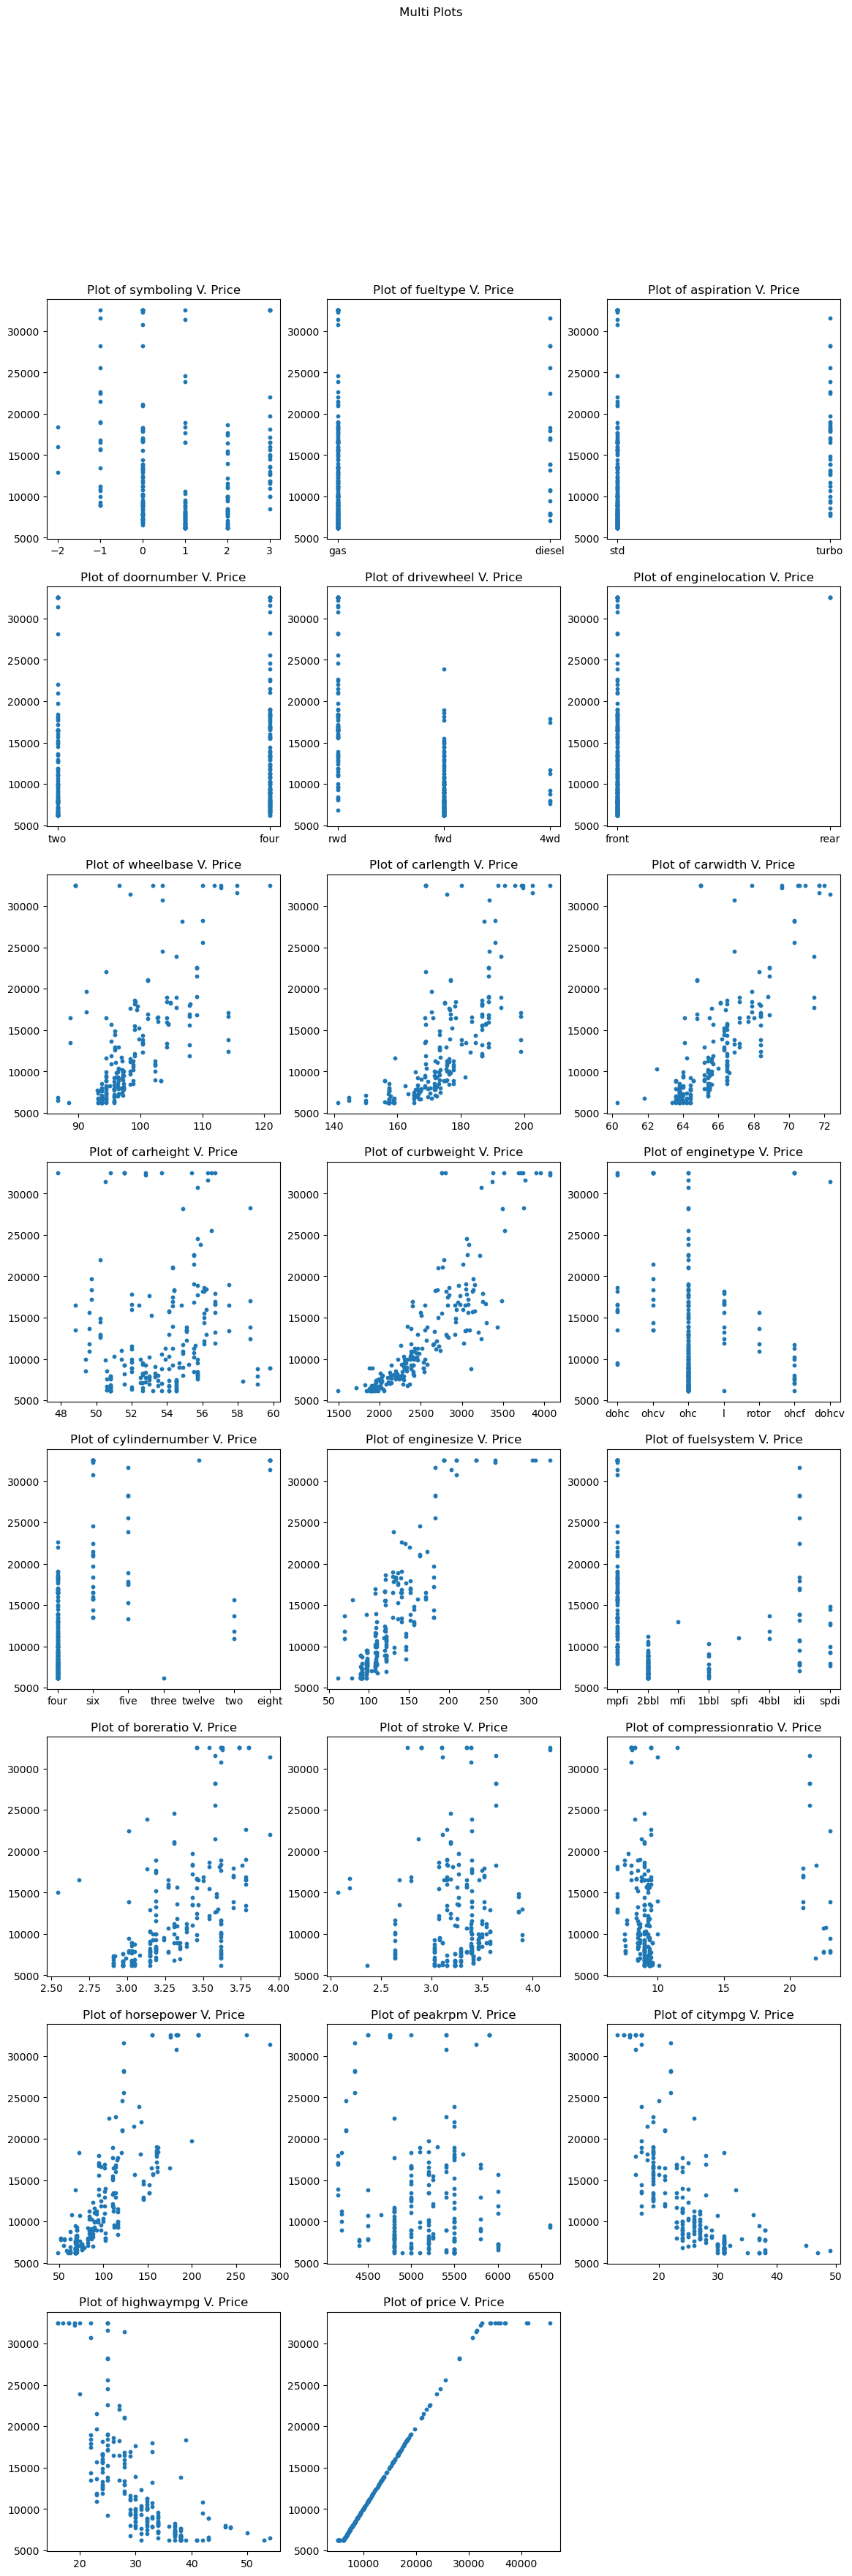

In [53]:
# Visualizing the dataset
num_cols = 3
num_rows = int((c_prices.shape[1]-1)/num_cols)+1

plt.figure(figsize=(14, 40))
for index, col in enumerate(c_prices.columns[:-1]):
    x = c_prices[col].values
    y = c_prices.iloc[:,-1:].values
    
    plt.subplot(num_rows, num_cols, index+1)
    plt.scatter(x,y, s=10)
    plt.title(f'Plot of {col} V. Price')


plt.suptitle("Multi Plots")
plt.show()

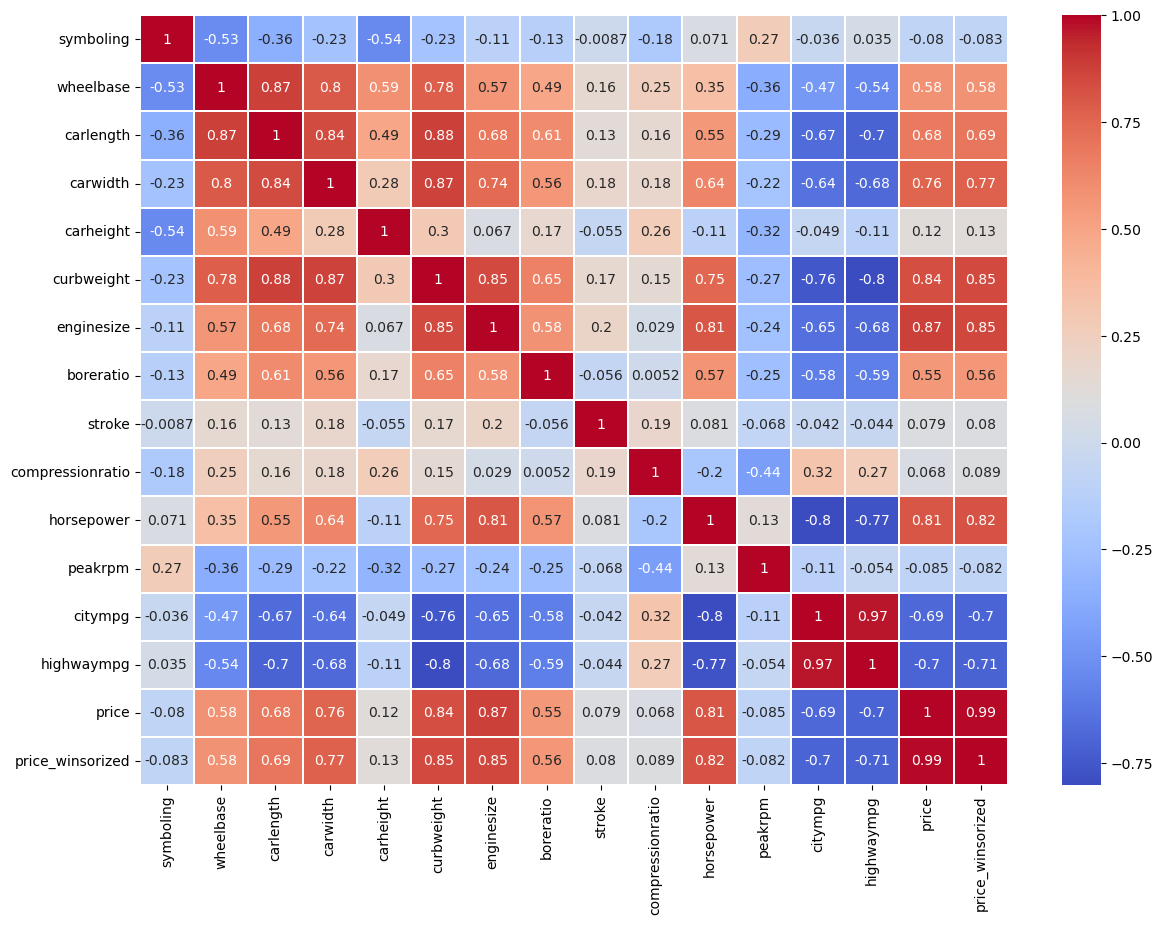

In [54]:
# Exclude non-numeric columns before building the correlation matrix
numeric_cols = c_prices.select_dtypes(include=np.number).columns
correlation_matrix = c_prices[numeric_cols].corr()

# Data Visualization: Building the Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.1)
plt.show()

In [56]:
numeric_cols = c_prices.select_dtypes(include=np.number).columns
correlation_matrix = c_prices[numeric_cols].corr()
correlation_matrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_winsorized
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.083400
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,0.584235
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.692818
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,0.771101
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,0.125768
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,0.851689
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,0.854761
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,0.563496
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,0.080203
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984,0.089398


### Q2.3. Discussing the preliminary observations about the dataset.

After visualizing the data using a heatmap to show correlations.
Features with strong positive correlations (close to 1) with the target variable "price" are indicative of a direct relationship, meaning an increase in these features tends to lead to an increase in car prices. The "enginesize" (0.87) and "curbweight" (0.84) fall into this category.
Features with moderate positive correlations (between 0.5 and 0.7) include "carwidth" (0.76) and "carlength" (0.68). 

### Q2.4. Building a multilayer perceptron model to predict the car price based on the other features in the dataset

In [57]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.neural_network import MLPRegressor

# Create MLP Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50),
                             activation='tanh',
                             solver='adam',
                             max_iter=2000,
                             alpha=0.0001,
                             random_state=42)

# Train the model
mlp_regressor.fit(X_train_scaled, y_train)

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=2000,
             random_state=42)

In [61]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred = mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 227254891.0946304


### Q2.5. Tune the model's hyperparameters and discuss the results.

In [62]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform Grid Search
grid_search = GridSearchCV(MLPRegressor(max_iter=2000, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Best Model Mean Squared Error:", mse)

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimi

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimi

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\student75\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\student75\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\student75\anaconda3\Lib\site-packages\sklearn\b

Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Best Model Mean Squared Error: 7005623.484396958


C:\Users\student75\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Best Model Mean Squared Error: 7005623.484396958

### Discussing the Results

### The initial Multilayer Perceptron (MLP) regression model yielded a Mean Squared Error (MSE) of 227254891.0946304. However, after hyperparameter tuning using GridSearchCV, the best model achieved a significantly reduced MSE of 7005623.484396958.

### The hyperparameter tuning process significantly improved the model's performance, as evidenced by the substantial reduction in MSE. The selected hyperparameters represent a well-balanced configuration, reflecting a good trade-off between model complexity and generalization ability.

<div class="alert alert-block alert-info">

# Part 2: Reflection 

</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

#### Reflection 1
Performing this activity involved analyzing the performance of a Multilayer Perceptron (MLP) regression model and then tuning its hyperparameters to improve its predictive accuracy. 
So we needed to have an understanding machine learning concepts, practical coding skills, and critical thinking to interpret the results effectively. By breaking down the initial model's performance and then conducting hyperparameter tuning using GridSearchCV, I gained insights into the impact of different parameters on model performance. Additionally, interpreting the results helped me understand how subtle changes in hyperparameters can lead to significant improvements in model accuracy.

#### Reflection 2
Learning to build and tune machine learning models, such as MLP regression, is crucial for several reasons. Firstly, it equips us with the skills to develop predictive models that can extract valuable insights from data, aiding in decision-making processes across various domains. Secondly, understanding hyperparameter tuning techniques enables me to optimize model performance, leading to more accurate predictions and better generalization on unseen data. Moreover, gaining proficiency in machine learning methodologies fosters critical thinking and problem-solving skills, which are essential in today's data-driven world.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab6.ipynb** to the **Lab 6 - Classification and Regression Using Multilayer Perceptron (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                               | Good                                                  | Average                                                | Below Average                                          | Poor                                                  | No Attempt                                            |
| ----------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.5          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.5          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection             |
